# Rift Data Academy

Premier *mid laner* server KR : 胡小青超酷#douyu  
Enregistré le 15/10/2024, rang général 2ième.   
puuid : yke-_ZuAP9wM6s3tpe-FnVWLlnwI4qLuLRzz933HfpI_jzKcDa1YwXbWGpFC7WJek_rv4x_kXk2Y-A  
Joueur pro : Qing  

Game la plus récente récupérée : Le 17/10/2024

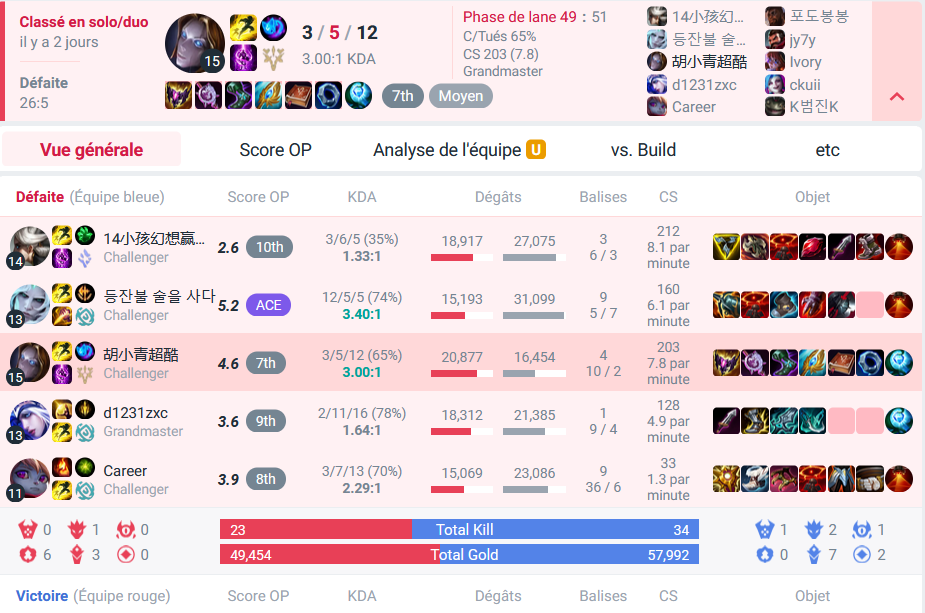

In [1]:
import requests
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import dotenv_values
import sqlite3
import sqlite_utils
import time


In [2]:
mid_kr_puuid = "yke-_ZuAP9wM6s3tpe-FnVWLlnwI4qLuLRzz933HfpI_jzKcDa1YwXbWGpFC7WJek_rv4x_kXk2Y-A"

In [3]:
config = dotenv_values(".env")
api_key = config['API_KEY']

# Stockage dans la base de données

## Récupération des IDS des matchs

In [28]:
conn = sqlite3.connect('koren_soloq_db.db')
cursor = conn.cursor()
conn.execute('''
    CREATE TABLE IF NOT EXISTS MATCHID (
        id TEXT PRIMARY KEY UNIQUE 
    )
''')

for i in range (0,600,100) : 
    testListIDMatch = requests.get(f"https://asia.api.riotgames.com/lol/match/v5/matches/by-puuid/yke-_ZuAP9wM6s3tpe-FnVWLlnwI4qLuLRzz933HfpI_jzKcDa1YwXbWGpFC7WJek_rv4x_kXk2Y-A/ids?queue=420&start={i}&count=100&api_key={api_key}").json()
    testListIDMatch = [(id,) for id in testListIDMatch]
    conn.executemany('''INSERT OR IGNORE INTO MATCHID (id) VALUES (?);''',testListIDMatch)
    conn.commit()




conn.close()
    

## Récupérations des data des matchs

### Creation de la table match data

In [40]:
conn = sqlite3.connect('koren_soloq_db.db')
cursor = conn.cursor()
#columns = ', '.join([f'{key} JSON' for key in data.keys()])
cursor.execute('''CREATE TABLE IF NOT EXISTS MATCH_DATA
                (metadata JSON PRIMARY KEY UNIQUE, info JSON, timelineinfo JSON);''')
conn.close()

### Recupère les ID dans la table matchID

In [38]:
conn = sqlite3.connect('koren_soloq_db.db')
cursor = conn.cursor()

matchsId = cursor.execute('''SELECT id FROM MATCHID''').fetchall()
conn.close()

### Lance les requêtes (avec sleep) sur les ID récupérer et stocke les data des matchs dans la table match_data

In [42]:
conn = sqlite3.connect('koren_soloq_db.db')
cursor = conn.cursor()

for match in matchsId :
    matchData = requests.get(f"https://asia.api.riotgames.com/lol/match/v5/matches/{match[0]}?api_key={api_key}").json()
    matchTimeline = requests.get(f'https://asia.api.riotgames.com/lol/match/v5/matches/{match[0]}/timeline?api_key={api_key}').json()
    metadata = json.dumps(matchData['metadata'])
    info = json.dumps(matchData['info'])
    timeline = json.dumps(matchTimeline['info'])
    conn.execute('''INSERT OR IGNORE INTO MATCH_DATA (metadata,info,timelineinfo) VALUES (?,?,?)''',[metadata,info,timeline])
    conn.commit()
    time.sleep(2.6)

conn.close()


# .